# Importing needed libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Explore the datase

In [2]:
data_dir="E:\Images"

In [3]:
categories = [] #classes array

for i in range(43): #there are 44 categories (classes), each represent a traffic sign
    categories.append(str(i)) #in string bec fn join() doesn't accept integers

print(categories)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42']


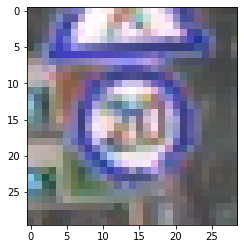

In [4]:
for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img))
        plt.imshow(img_arr)
        plt.show()
        break
    break

In [5]:
#more insights about the data
print(img_arr.shape)

(30, 29, 3)


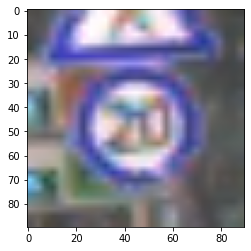

In [6]:
#resizing all images to the same size
#img_size = 90*90
new_arr = cv2.resize(img_arr,(90,90))
plt.imshow(new_arr)


In [7]:
print(new_arr.shape)

(90, 90, 3)


In [8]:
train_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_no = categories.index(category)
        for img in os.listdir(path):
            try: #try-except used to skip the broken images in the dataset 
                img_arr = cv2.imread(os.path.join(path, img))
                new_arr = cv2.resize(img_arr,(90,90))
                train_data.append([new_arr, class_no])
            except Exception as e:
                pass

create_training_data() #running the fn               

In [9]:
#more insights about the data
print(len(train_data))

39209


In [10]:
#more insights about the data
for sample in train_data:
    print(sample[1])

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [11]:
#data must be shuffled to avoide the consquence repeat of same group
import random
random.shuffle(train_data)

In [12]:
#more insights about the data
for sample in train_data:
    print(sample[1])

19
13
8
8
7
4
42
13
8
29
13
42
27
7
8
11
18
14
5
12
4
10
12
13
13
4
38
10
13
5
12
6
11
22
29
18
13
8
33
33
40
13
2
8
29
31
3
14
33
20
9
13
25
4
4
13
2
42
38
5
4
13
8
5
15
8
2
31
3
2
13
3
11
12
7
18
38
1
4
12
10
12
35
4
38
2
40
7
12
14
8
7
26
7
5
30
9
24
5
26
18
38
26
37
11
38
28
8
0
3
4
11
10
8
36
9
1
1
21
22
2
1
21
8
29
4
5
38
6
17
2
29
11
18
13
25
24
23
11
4
18
13
41
14
16
25
25
4
19
1
8
16
18
13
26
12
13
2
11
1
1
21
13
20
17
4
2
12
9
1
1
14
2
28
7
25
16
25
1
24
35
14
25
10
38
25
2
29
25
4
17
25
9
18
12
3
19
11
35
9
1
11
14
11
9
4
8
10
1
22
7
2
1
31
11
13
2
12
27
2
11
35
3
5
1
38
26
2
41
5
18
12
10
25
8
13
1
9
2
39
13
21
18
36
23
37
2
7
18
17
17
25
25
10
21
4
13
17
15
18
1
28
4
5
3
13
38
22
32
13
38
25
9
1
8
10
12
35
32
25
38
8
5
38
16
16
33
34
2
24
5
30
26
36
33
11
11
2
16
8
1
23
38
18
3
32
38
3
2
38
3
15
6
2
8
38
35
14
1
8
25
25
1
14
24
4
9
38
2
14
2
4
31
3
9
8
11
31
16
6
3
7
18
4
12
21
1
38
1
23
8
16
2
8
7
2
38
28
38
5
14
13
12
16
1
18
11
26
2
4
36
6
29
1
38
4
33
9
7
3
1
38
17
16


In [13]:
#more insights about the data
print(np.asarray(train_data).shape)

(39209, 2)


c:\users\dell\mynewenv\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [14]:
x = []
y = []

for features,label in train_data:
    x.append(features)
    y.append(label)
x = np.array(x)
x.reshape(-1,1) ####

y = np.array(y)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [16]:
#more insights about the data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(31367, 90, 90, 3) (31367,) (7842, 90, 90, 3) (7842,)


In [17]:
# y_train = to_categorical(y_train,43)
# y_test = to_categorical(y_test,43)

# Building CNN Model

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax')) #Dense is 43 as the no of classes is 43

#to compile the model
#the loss fn 'sparse_categorical_crossentropy' works on integer target (classes (labels) are integers).
#while 'categorical_crossentropy' loss fn works on one-hot encoded target. 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model

In [19]:
epochs = 4  #epochs -> no of complete passes through training data
#batch_size -> no of samples (in our model, better to use 64 instesd of 32)
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_data=(x_test, y_test)) 

Epoch 1/4
491/491 [==============================] - 1519s 3s/step - loss: 2.0789 - accuracy: 0.5863 - val_loss: 0.2949 - val_accuracy: 0.9292
Epoch 2/4
491/491 [==============================] - 1467s 3s/step - loss: 0.4647 - accuracy: 0.8665 - val_loss: 0.1934 - val_accuracy: 0.9528
Epoch 3/4
491/491 [==============================] - 1439s 3s/step - loss: 0.3156 - accuracy: 0.9075 - val_loss: 0.1243 - val_accuracy: 0.9680
Epoch 4/4
491/491 [==============================] - 1454s 3s/step - loss: 0.2492 - accuracy: 0.9243 - val_loss: 0.0997 - val_accuracy: 0.9693


# Accuracy of the model

In [20]:
score = model.evaluate(x_test, y_test, verbose = 0)
print(f'Accuracy of the model: {score[1]}')

Accuracy of the model: 0.9692680239677429


# Saving the model

In [21]:
model.save('traffic_signs_classifier.h5')